In [1]:
import numpy as np
import yroots as yr
import matplotlib.pyplot as plt
import warnings

%load_ext autoreload
%autoreload 2

In [2]:
from yroots.polynomial import Polynomial

In [3]:
# function to filter out roots outside of the interval (allows for nicer plots)
def rootfilter(roots,a,b,tol):
    roots = roots[np.all(roots >= a - tol,axis = 1)]
    roots = roots[np.all(roots <= b + tol,axis = 1)]
    return roots

In [4]:
def printRoot(r1,r2,a,b):
    plt.figure(dpi=600)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6.5, 3)
    plt.xlim(a[0],b[0])
    plt.xlabel('$x$')
    plt.ylim(a[1],b[1])
    plt.ylabel('$y$')
    plt.title('Zero-Loci and Roots')

    dim = 2

    #print the contours
    contour_colors = ['#003cff','#50c878'] #royal blue and emerald green
    x = np.linspace(a[0],b[0],100)
    y = np.linspace(a[1],b[1],100)
    X,Y = np.meshgrid(x,y)
    funcs = [f,g]
    for i in range(dim):
        if isinstance(funcs[i], Polynomial):
            Z = np.zeros_like(X)
            for spot,num in np.ndenumerate(X):
                Z[spot] = funcs[i]([X[spot],Y[spot]])
            plt.contour(X,Y,Z,levels=[0],colors=contour_colors[i])
        else:
            plt.contour(X,Y,funcs[i](X,Y),levels=[0],colors=contour_colors[i])

    colors = ['w','#c3c3c3', 'C8', '#708090', '#897A57', '#D6C7A4','#73e600','#ccff99']

    plt.plot(np.real(r2[0]), np.real(r2[1]),'o',color='k',markeredgecolor='k',markersize=3,
         zorder=22,label='Second')
    plt.plot(np.real(r1[0]), np.real(r1[1]),'o',color='m',markeredgecolor='m',markersize=3,
         zorder=22,label='First')
    plt.legend()
    plt.show()
    
def printRoots(r1,r2,e=1e-10):
    if len(r1.shape) == 1:
        r2 = r2[0]
        a = np.zeros(len(r2))
        b = np.zeros(len(r2))
        for j in range(len(r2)):
            a[j] = min(r1[j],r2[j]) - e
            b[j] = max(r1[j],r2[j]) + e
        printRoot(r1,r2,a,b)
        return
    randLine = np.random.rand(len(r1[0]))
    order = np.argsort(r1@randLine, axis=0)
    r1 = r1[order]
    order = np.argsort(r2@randLine, axis=0)
    r2 = r2[order]
    a = np.zeros(len(r2[0]))
    b = np.zeros(len(r2[0]))
    for i in range(len(r2)):
        for j in range(len(r2[i])):
            a[j] = min(r1[i][j],r2[i][j]) - e - abs(r1[i][j]-r2[i][j])
            b[j] = max(r1[i][j],r2[i][j]) + e + abs(r1[i][j]-r2[i][j])
        printRoot(r1[i],r2[i],a,b)

In [5]:
dim = 2
def get_interval(steps,a,b):
    RAND = 0.5139303900908738
    for step in steps:
        diffs = ((b-a)*RAND)
        if step == 0:
            a += diffs
        elif step == 1:
            a[0] += diffs[0]
            b[1] = a[1] + diffs[1]
        elif step == 2:
            b[0] = a[0] + diffs[0]
            a[1] += diffs[1]
        elif step == 3:
            b = a + diffs
        else:
            raise ValueError('invalid step')
    return a,b
steps = []
# a,b = get_interval(steps,a,b)

In [6]:
import time
startTime = time.time()

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 859
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.2328 98.3702  1.397   0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

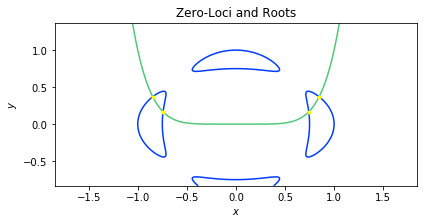

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and real solutions:
[1.40543009e-15 1.10500660e-15 1.29948273e-15 1.24126708e-15]
Distance between yroots solutions and real solutions:
[6.95309024e-15 9.35725215e-15 3.45107965e-15 1.94605977e-15]


In [7]:
###test_roots01
#01
f = lambda x,y: 144*(x**4+y**4)-225*(x**2+y**2) + 350*x**2*y**2+81
g = lambda x,y: y-x**6

r1 = np.loadtxt('chebfun_test_output/cftest1_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])

r2 = yr.solve([f,g],a-1,b+1,plot=True)
#r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

In [42]:
A = np.arange(10).reshape(2,5)

In [43]:
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [52]:
idx = np.array([2,3])
idx

array([2, 3])

In [53]:
A[:,np.array([2,3])] = A[:,np.array([3,2])]
A

array([[0, 1, 3, 2, 4],
       [5, 6, 8, 7, 9]])

In [58]:
dim = 2
np.zeros([2]*dim)

array([[0., 0.],
       [0., 0.]])

# `test_roots01`

In [8]:
f(*r1.T),f(*r2.T),f(*r3.T),g(*r1.T),g(*r2.T),g(*r3.T)

(array([-2.84217094e-14, -4.26325641e-14, -4.26325641e-14, -2.84217094e-14]),
 array([-5.68434189e-14, -3.26849658e-13,  1.27897692e-13, -2.27373675e-13]),
 array([ 1.42108547e-14, -2.84217094e-14,  0.00000000e+00,  1.42108547e-14]),
 array([-6.66133815e-16,  7.77156117e-16,  7.77156117e-16, -6.66133815e-16]),
 array([-1.22124533e-15,  5.30131494e-15,  7.77156117e-16,  4.24660307e-15]),
 array([0., 0., 0., 0.]))

Percent Finished: 8.45%       

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 2080
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [7.69200e-01 9.75962e+01 1.53850e+00 9.62000e-02 0.00000e+00]


<Figure size 3600x2400 with 0 Axes>

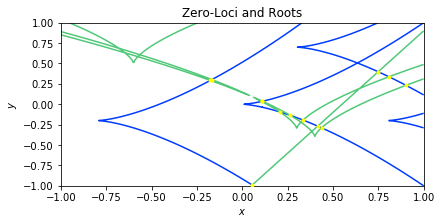

CPU times: user 8.02 s, sys: 140 ms, total: 8.16 s
Wall time: 8.31 s
Number of roots: 13
Number found by yroots: 13
Distance between chebfun solutions and real solutions:
[3.51956568e-14 2.28149740e-07 9.51087879e-07 6.68539700e-09
 3.03865322e-09 2.40649816e-10 4.01277189e-09 7.70393699e-09
 9.83171814e-07 2.30078665e-07 3.42685044e-14 1.48952049e-15
 2.51214793e-15]
Distance between yroots solutions and real solutions:
[1.37356610e-12 1.65791063e-11 1.51764294e-11 9.05946431e-11
 1.74446252e-10 2.56936181e-10 1.16671942e-10 9.20571341e-11
 1.50313517e-11 2.07967978e-11 1.08123457e-12 9.40290641e-13
 6.64998505e-13]


In [9]:
#02
f = lambda x,y: (y**2-x**3)*((y-0.7)**2-(x-0.3)**3)*((y+0.2)**2-(x+0.8)**3)*((y+0.2)**2-(x-0.8)**3)
g = lambda x,y: ((y+.4)**3-(x-.4)**2)*((y+.3)**3-(x-.3)**2)*((y-.5)**3-(x+.6)**2)*((y+0.3)**3-(2*x-0.8)**3)

r1 = np.loadtxt('chebfun_test_output/cftest1_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])-1
b = np.array([max(r1[:,0]),max(r1[:,1])])+1

a = np.array([-1.,-1.])
b = np.array([1.,1.])

%time r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

In [10]:
print('chebfun',f(*r1.T),g(*r1.T),sep='\n')
print('yroots',f(*r2.T),g(*r2.T),sep='\n')
print('real',f(*r3.T),g(*r3.T),sep='\n')

chebfun
[ 1.21914461e-17  5.80751001e-17 -6.49386818e-16  2.16565708e-15
  2.20780938e-15  2.12029635e-13 -1.98754286e-12 -7.83195384e-17
  1.02004686e-12 -4.83149495e-14 -3.37228856e-16  2.70529695e-16
  6.33905412e-16]
[-6.17084322e-16 -4.99751457e-16  4.27696199e-15  8.49926541e-17
  6.82437747e-18  1.07952260e-14  3.50336590e-14  1.42746531e-14
  3.58488299e-13 -3.03343683e-13  1.28244202e-15  2.96386945e-16
 -1.27794377e-15]
yroots
[ 2.61254391e-14  1.13669249e-13  2.34133177e-14 -1.43740912e-13
 -6.21933624e-14  1.07579230e-13  3.50994554e-14  2.39895497e-13
  2.10206024e-13  1.45026377e-13 -2.10076636e-13 -6.68444402e-14
 -7.86697764e-14]
[-1.99164617e-13 -1.19801419e-13  2.34823321e-13 -5.08880901e-14
  3.07434244e-14 -9.61086291e-18  5.55893747e-18  2.55957900e-17
  7.95613712e-16  1.12554733e-14  1.58221355e-14 -6.66928100e-19
 -3.42824624e-19]
real
[ 0.00000000e+00  0.00000000e+00  3.24693409e-16  2.61527519e-20
  5.19142537e-20 -2.43215729e-19 -4.59798376e-19  8.15828538e-1

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

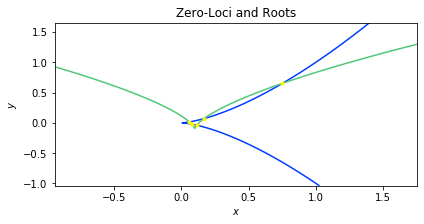

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.98174628e-15 2.00657647e-15 5.67706512e-15 3.91818394e-15
 0.00000000e+00]
Distance between yroots solutions and real solutions:
[1.08062785e-12 2.42818197e-13 1.11394681e-12 2.24649795e-14
 1.66903118e-15]
Chebfun Residuals
[-1.22785896e-16 -8.52725009e-17 -3.77302356e-17 -1.71737624e-16
  0.00000000e+00]
[8.93382590e-17 9.02056208e-17 1.76128643e-16 1.25767452e-16
 0.00000000e+00]
YRoots Residuals
[-1.99840144e-15  3.21530996e-15 -1.15039814e-14  4.23489369e-14
 -4.05110515e-14]
[-2.72004641e-15  2.04957579e-15  8.32152272e-15 -1.93056834e-14
  2.03973123e-14]
Real Residuals
[0.00000000e+00 1.08420217e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[ 0.00000000e+00  1.62630326e-19 -1.08420217e-19  0.00000000e+00
  0.00000000e+00]


In [11]:
#03
f = lambda x,y: y**2-x**3
g = lambda x,y: (y+.1)**3-(x-.1)**2

r1 = np.loadtxt('chebfun_test_output/cftest1_3.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions//cftest1_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
print('Chebfun Residuals',f(*r1.T),g(*r1.T),sep='\n')
print('YRoots Residuals',f(*r2.T),g(*r2.T),sep='\n')
print('Real Residuals',f(*r3.T),g(*r3.T),sep='\n')

In [12]:
print('Chebfun Residuals',f(*r1.T),g(*r1.T),sep='\n')
print('YRoots Residuals',f(*r2.T),g(*r2.T),sep='\n')
print('Real Residuals',f(*r3.T),g(*r3.T),sep='\n')

Chebfun Residuals
[-1.22785896e-16 -8.52725009e-17 -3.77302356e-17 -1.71737624e-16
  0.00000000e+00]
[8.93382590e-17 9.02056208e-17 1.76128643e-16 1.25767452e-16
 0.00000000e+00]
YRoots Residuals
[-1.99840144e-15  3.21530996e-15 -1.15039814e-14  4.23489369e-14
 -4.05110515e-14]
[-2.72004641e-15  2.04957579e-15  8.32152272e-15 -1.93056834e-14
  2.03973123e-14]
Real Residuals
[0.00000000e+00 1.08420217e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[ 0.00000000e+00  1.62630326e-19 -1.08420217e-19  0.00000000e+00
  0.00000000e+00]


Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

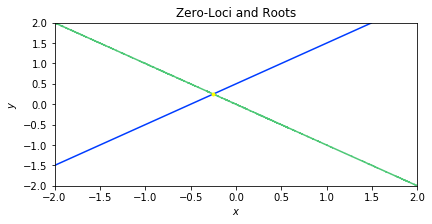

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
0.0
Distance between yroots solutions and real solutions:
0.0


In [13]:
#04
f = lambda x,y: x - y + .5
g = lambda x,y: x + y

r1 = np.loadtxt('chebfun_test_output/cftest1_4.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_4.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and real solutions:')
print(np.linalg.norm(r1-r3))
print('Distance between yroots solutions and real solutions:')
print(np.linalg.norm(r2-r3))

In [14]:
print('chebfun',f(*r1.T),g(*r1.T),sep='\n')
print('yroots',f(*r2.T),g(*r2.T),sep='\n')
print('real',f(*r3.T),g(*r3.T),sep='\n')

chebfun
0.0
0.0
yroots
[0.]
[0.]
real
0.0
0.0


Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0. 100.   0.   0.]


<Figure size 3600x2400 with 0 Axes>

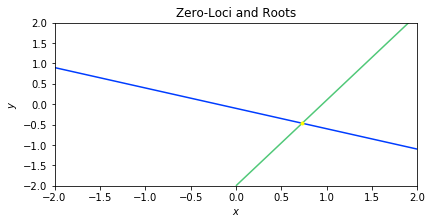

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
4.47545209131181e-16
Distance between yroots solutions and real solutions:
1.1102230246251565e-16


In [15]:
#05
### THIS ONE FAILS
f = lambda x,y: y + x/2 + 1/10
g = lambda x,y: y - 2.1*x + 2

r1 = np.loadtxt('chebfun_test_output/cftest1_5.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest1_5.csv',delimiter=',')

#only one root
a = np.array([-1,-1])
b = np.array([1,1])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',1)
print('Number found by yroots:',r2.shape[0])
print('Distance between chebfun solutions and real solutions:')
print(np.linalg.norm(r1-r3))
print('Distance between yroots solutions and real solutions:')
print(np.linalg.norm(r2-r3))

# `test_roots02`

Percent Finished: 15.07%       

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 2572
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [21.5008 76.8663  1.633   0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

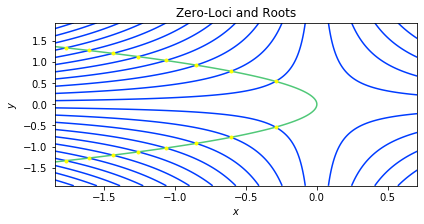

Number of roots: 6
Number found by yroots: 6
Distance between chebfun solutions and real solutions:
[3.14018492e-16 2.22044605e-16 1.57009246e-16 1.57009246e-16
 5.55111512e-17 2.28878340e-16]
Distance between yroots solutions and real solutions:
[4.00296604e-15 9.91150012e-15 1.98285957e-14 2.77042358e-14
 1.06206339e-14 8.83604319e-15]


In [16]:
#01
f = lambda x,y: np.cos(10*x*y)
g = lambda x,y: x + y**2

r1 = np.loadtxt('chebfun_test_output/cftest2_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions//cftest2_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


<Figure size 3600x2400 with 0 Axes>

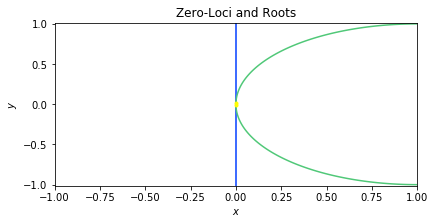

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and real solutions:
[1.49272955e-14 1.49272955e-14]
Distance between yroots solutions and real solutions:
[1.80827575e-14 1.80827575e-14]


In [17]:
#02
f = lambda x,y: x
g = lambda x,y: (x-.9999)**2 + y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest2_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest2_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 1120
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 3.6607 94.375   1.9643  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

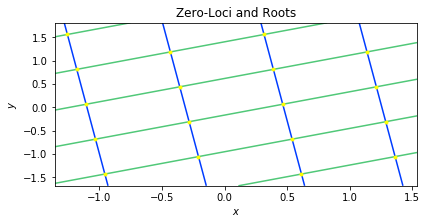

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.88578059e-16 5.90091632e-16 5.55111512e-17 2.98936698e-16
 6.28036983e-16]
Distance between yroots solutions and real solutions:
[3.33098362e-14 3.80664456e-14 1.98258747e-13 1.81953411e-13
 6.02084909e-15]


In [18]:
#03
f = lambda x,y: np.sin(4*(x + y/10 + np.pi/10))
g = lambda x,y: np.cos(2*(x-2*y+ np.pi/7))

r1 = np.loadtxt('chebfun_test_output/cftest2_3.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest2_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

# `test_roots03`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 841
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.5945 97.503   1.9025  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

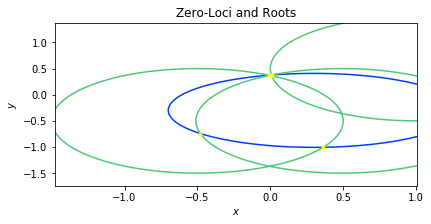

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and real solutions:
[1.11022302e-16 1.09599977e-13 2.89550330e-12 1.07967857e-12]
Distance between yroots solutions and real solutions:
[3.09951125e-14 3.22382872e-11 1.13797028e-09 3.20540928e-10]


In [19]:
#01
f = lambda x,y: ((x-.3)**2+2*(y+0.3)**2-1)
g = lambda x,y: ((x-.49)**2+(y+.5)**2-1)*((x+0.5)**2+(y+0.5)**2-1)*((x-1)**2+(y-0.5)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest3_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 11323
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.5741 97.6596  0.5829  1.1834  0.    ]


<Figure size 3600x2400 with 0 Axes>

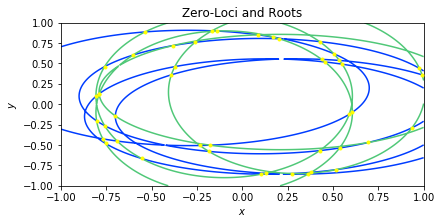

Number of roots: 45
Number found by yroots: 45
Distance between chebfun solutions and real solutions:
[1.41678007e-12 1.43614118e-14 1.71644354e-09 1.95374539e-09
 6.53901569e-15 1.02237014e-14 7.68624006e-15 5.44122558e-15
 7.99437673e-15 3.92523115e-15 1.49666135e-14 2.43490919e-15
 1.26054323e-14 6.99638732e-15 4.31367366e-14 9.39976079e-15
 6.37663435e-14 1.86062581e-14 7.42453088e-14 1.46058953e-14
 6.97101726e-14 3.05962420e-14 2.72648142e-12 2.83935514e-09
 3.20066051e-09 3.32847103e-15 4.40880523e-14 7.16665302e-14
 5.28173654e-14 5.74969595e-14 4.51555152e-15 6.88897636e-15
 1.19265033e-14 6.99087965e-15 7.27090136e-15 2.73908018e-14
 1.72066661e-14 2.07596863e-14 4.46580225e-15 2.19363888e-14
 1.21339809e-14 4.79951609e-14 5.81676347e-15 3.28032861e-15
 6.46794248e-15]
Distance between yroots solutions and real solutions:
[8.82917730e-14 3.62483992e-15 5.68034512e-12 9.02278498e-13
 1.24839630e-14 2.93107289e-15 3.33066907e-15 1.37130342e-13
 1.16799736e-13 7.35936353e-15 1.1

In [20]:
#02
f = lambda x,y: ((x-0.1)**2+2*(y-0.1)**2-1)*((x+0.3)**2+2*(y-0.2)**2-1)*((x-0.3)**2+2*(y+0.15)**2-1)*((x-0.13)**2+2*(y+0.15)**2-1)
g = lambda x,y: (2*(x+0.1)**2+(y+0.1)**2-1)*(2*(x+0.1)**2+(y-0.1)**2-1)*(2*(x-0.3)**2+(y-0.15)**2-1)*((x-0.21)**2+2*(y-0.15)**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest3_2.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest3_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])

a = np.array([-1.,-1.])
b = np.array([1.,1.])

r2 = yr.solve([f,g],a,b,plot=True, abs_approx_tol=1e-15, max_cond_num=1e10)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots04`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 1312
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 2.1341 95.9604  1.9055  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

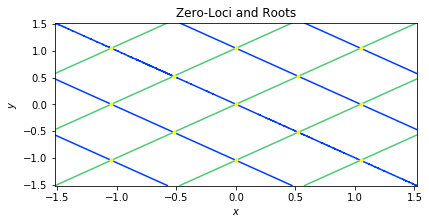

Number of roots: 5
Number found by yroots: 5
Distance between chebfun solutions and real solutions:
[3.14018492e-16 3.14018492e-16 4.44893803e-18 3.14018492e-16
 3.14018492e-16]
Distance between yroots solutions and real solutions:
[1.00799936e-13 7.69345305e-15 4.61577092e-14 9.65606862e-14
 1.74280263e-13]


In [21]:
#01
f = lambda x,y: np.sin(3*(x+y))
g = lambda x,y: np.sin(3*(x-y))

r1 = np.loadtxt('chebfun_test_output/cftest4_1.csv',delimiter=',')
r3 = np.loadtxt('erik_test_solutions/cftest4_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 70
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.     98.5714  1.4286  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

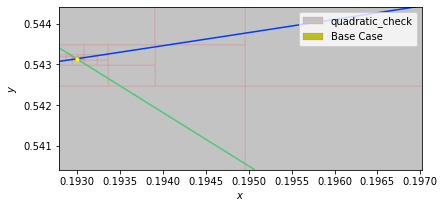

Number of roots: 1
Number found by yroots: 1
Distance between chebfun solutions and real solutions:
[4.4134996e-14]
Distance between yroots solutions and real solutions:
[3.35551938e-14]


In [22]:
#02
f = lambda x,y: ((90000*y**10 + (-1440000)*y**9 + (360000*x**4 + 720000*x**3 + 504400*x**2 + 144400*x + 9971200)*(y**8) + 
                ((-4680000)*x**4 + (-9360000)*x**3 + (-6412800)*x**2 + (-1732800)*x + (-39554400))*(y**7) + (540000*x**8 + 
                2160000*x**7 + 3817600*x**6 + 3892800*x**5 + 27577600*x**4 + 51187200*x**3 + 34257600*x**2 + 8952800*x + 100084400)*(y**6) + 
                ((-5400000)*x**8 + (-21600000)*x**7 + (-37598400)*x**6 + (-37195200)*x**5 + (-95198400)*x**4 + 
                (-153604800)*x**3 + (-100484000)*x**2 + (-26280800)*x + (-169378400))*(y**5) + (360000*x**12 + 2160000*x**11 + 
                6266400*x**10 + 11532000*x**9 + 34831200*x**8 + 93892800*x**7 + 148644800*x**6 + 141984000*x**5 + 206976800*x**4 + 
                275671200*x**3 + 176534800*x**2 + 48374000*x + 194042000)*(y**4) + ((-2520000)*x**12 + (-15120000)*x**11 + (-42998400)*x**10 + 
                (-76392000)*x**9 + (-128887200)*x**8 + (-223516800)*x**7 + (-300675200)*x**6 + (-274243200)*x**5 + (-284547200)*x**4 + 
                (-303168000)*x**3 + (-190283200)*x**2 + (-57471200)*x + (-147677600))*(y**3) + (90000*x**16 + 720000*x**15 + 3097600*x**14 + 
                9083200*x**13 + 23934400*x**12 + 58284800*x**11 + 117148800*x**10 + 182149600*x**9 + 241101600*x**8 + 295968000*x**7 + 
                320782400*x**6 + 276224000*x**5 + 236601600*x**4 + 200510400*x**3 + 123359200*x**2 + 43175600*x + 70248800)*(y**2) + 
                ((-360000)*x**16 + (-2880000)*x**15 + (-11812800)*x**14 + (-32289600)*x**13 + (-66043200)*x**12 + (-107534400)*x**11 + 
                (-148807200)*x**10 + (-184672800)*x**9 + (-205771200)*x**8 + (-196425600)*x**7 + (-166587200)*x**6 + (-135043200)*x**5 + 
                (-107568800)*x**4 + (-73394400)*x**3 + (-44061600)*x**2 + (-18772000)*x + (-17896000))*y + (144400*x**18 + 1299600*x**17 + 
                5269600*x**16 + 12699200*x**15 + 21632000*x**14 + 32289600*x**13 + 48149600*x**12 + 63997600*x**11 + 67834400*x**10 + 
                61884000*x**9 + 55708800*x**8 + 45478400*x**7 + 32775200*x**6 + 26766400*x**5 + 21309200*x**4 + 11185200*x**3 + 6242400*x**2 + 
                3465600*x + 1708800)))
g = lambda x,y: 1e-4*(y**7 + (-3)*y**6 + (2*x**2 + (-1)*x + 2)*y**5 + (x**3 + (-6)*x**2 + x + 2)*y**4 + (x**4 + (-2)*x**3 + 2*x**2 + 
                x + (-3))*y**3 + (2*x**5 + (-3)*x**4 + x**3 + 10*x**2 + (-1)*x + 1)*y**2 + ((-1)*x**5 + 3*x**4 + 4*x**3 + (-12)*x**2)*y + 
                (x**7 + (-3)*x**5 + (-1)*x**4 + (-4)*x**3 + 4*x**2))

r1 = np.loadtxt('chebfun_test_output/cftest4_2.csv',delimiter=',')[0].reshape(1,2)
r3 = np.loadtxt('erik_test_solutions/cftest4_2.csv',delimiter=',')[0].reshape(1,2)
a = np.array([-1.,-1.])
b = np.array([1.,1.])

steps = [0,2,3,1,3,1,3,2,2]
a,b = get_interval(steps,a,b)

r2 = yr.solve([f,g],a,b,plot=True,plot_intervals=True)
# r2 = rootfilter(r2,a,b,1e-5)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and real solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r3,axis=0),axis=1))
    print('Distance between yroots solutions and real solutions:')
    print(np.linalg.norm(np.sort(r2,axis=0)-np.sort(r3,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots05`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 10423
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 6.0347 92.3534  1.6118  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

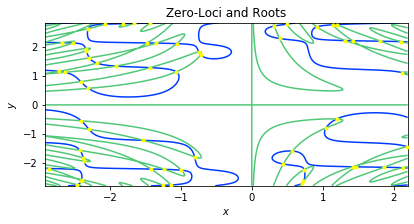

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[4.59675237e-14 2.30424107e-14 3.09312199e-14 8.20355655e-14
 7.46209463e-14 1.44397298e-14 1.10242407e-14 1.00804338e-14
 4.09411958e-14 2.54470577e-13]


In [23]:
#01
f = lambda x,y: 2*x*y*np.cos(y**2)*np.cos(2*x)-np.cos(x*y)
g = lambda x,y: 2*np.sin(x*y**2)*np.sin(3*x*y)-np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest5_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots06`

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

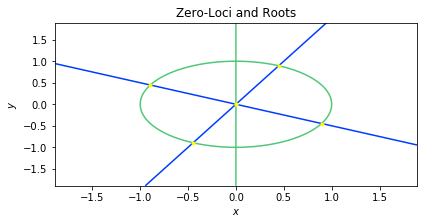

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 2.68876173e-16 -3.43287468e-08]
 [ 3.10019547e-16  3.43287459e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]


In [24]:
#01
f = lambda x,y: (y - 2*x)*(y+0.5*x)
g = lambda x,y: x*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

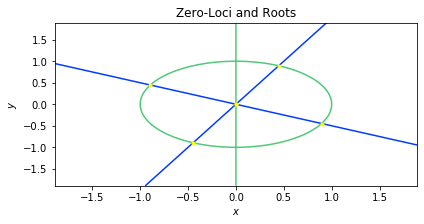

Number of roots: 5
Number found by yroots: 6
chebfun solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [-9.89338159e-18 -1.06428375e-08]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]
yroots solutions:
[[-8.94427191e-01 -8.94427191e-01]
 [-4.47213595e-01 -4.47213595e-01]
 [ 1.00000000e-04 -5.00000081e-05]
 [ 1.00000000e-04  2.00000008e-04]
 [ 4.47213595e-01  4.47213595e-01]
 [ 8.94427191e-01  8.94427191e-01]]


In [25]:
#02
f = lambda x,y: (y - 2*x)*(y+.5*x)
g = lambda x,y: (x-.0001)*(x**2+y**2-1)

r1 = np.loadtxt('chebfun_test_output/cftest6_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

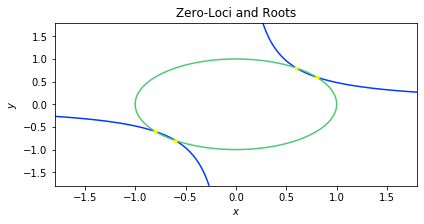

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[1.00810451e-14 1.21238184e-14 2.74654008e-15 2.53656200e-15]


In [26]:
#03
f = lambda x,y: 25*x*y - 12
g = lambda x,y: x**2+y**2-1

r1 = np.loadtxt('chebfun_test_output/cftest6_3.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots07`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 1762
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 0.1703 98.1839  1.6459  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

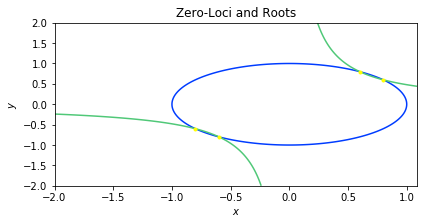

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[7.57884785e-15 4.77912004e-15 6.81089025e-14 6.13972405e-14]


In [27]:
#01
f = lambda x,y: (x**2+y**2-1)*(x-1.1)
g = lambda x,y: (25*x*y-12)*(x-1.1)

r1 = np.loadtxt('chebfun_test_output/cftest7_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
#Undefined at x = 1.1
a = np.array([-2.,-2.])
b = np.array([1.09,2.])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 1180
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 2.3729 96.2712  0.5932  0.7627  0.    ]


<Figure size 3600x2400 with 0 Axes>

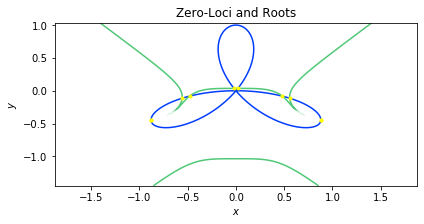

Number of roots: 10
Number found by yroots: 10
Distance between chebfun solutions and yroots solutions:
[2.04840691e-13 9.92181825e-13 4.87399794e-13 1.03838279e-13
 2.87441278e-11 2.90118668e-11 3.49140430e-14 1.92578297e-14
 1.80863386e-13 3.53276990e-13]


In [28]:
#02
f = lambda x,y: y**4 + (-1)*y**3 + (2*x**2)*(y**2) + (3*x**2)*y + (x**4)
h = lambda x,y: y**10-2*(x**8)*(y**2)+4*(x**4)*y-2
g = lambda x,y: h(2*x,2*(y+.5))

r1 = np.loadtxt('chebfun_test_output/cftest7_2.csv',delimiter=',')
r1 = np.loadtxt('erik_test_solutions/cftest7_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 319
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 4.0752 94.3574  1.5674  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

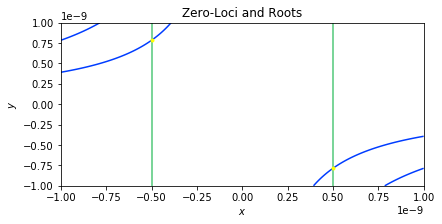

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[2.66327190e-22 6.86306732e-22]


In [29]:
#03
e = 1e-09
f = lambda x,y: np.cos(x*y/(e**2))+np.sin(3*x*y/(e**2))
g = lambda x,y: np.cos(y/e)-np.cos(2*x*y/(e**2))

r1 = np.loadtxt('chebfun_test_output/cftest7_3.csv',delimiter=',')
a = np.array([-e,-e])
b = np.array([e,e])
r2 = yr.solve([f,g],a,b,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots08`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 6055
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 5.1693 93.0636  1.7671  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

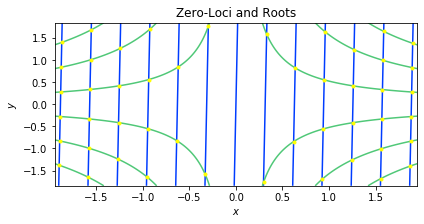

Number of roots: 8
Number found by yroots: 8
Distance between chebfun solutions and yroots solutions:
[2.55592535e-15 2.63122857e-14 1.15910687e-15 3.44571806e-14
 8.09359438e-14 9.48964713e-15 1.10023102e-13 1.92515874e-13]


In [30]:
#01
f = lambda x,y: np.sin(10*x-y/10)
g = lambda x,y: np.cos(3*x*y)

r1 = np.loadtxt('chebfun_test_output/cftest8_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 3217
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 7.5536 90.7678  1.6786  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

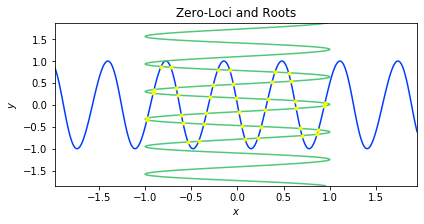

Number of roots: 39
Number found by yroots: 39
Distance between chebfun solutions and yroots solutions:
[1.46759558e-14 3.18113286e-14 1.59520930e-14 1.57956296e-14
 7.95700800e-14 8.61982190e-14 9.48964713e-15 6.74680440e-14
 3.01367785e-14 1.45048843e-14 6.09217118e-14 7.97821939e-14
 1.35338782e-13 1.78058289e-13 5.28135220e-14 4.11788365e-14
 2.62446250e-14 1.23727988e-13 6.59532430e-14 9.12235939e-14
 1.05454349e-13 1.05609819e-13 6.01502260e-14 1.72730241e-14
 6.78337410e-14 7.03268231e-14 8.11618593e-14 9.72758129e-14
 9.12689256e-14 5.56682475e-14 4.16467210e-14 2.66677789e-14
 4.96270934e-14 2.77946280e-14 8.51978089e-14 2.78088153e-14
 1.55435188e-14 3.21161635e-14 1.26253399e-14]


In [31]:
#02
f = lambda x,y: np.sin(10*x-y/10) + y
g = lambda x,y: np.cos(10*y-x/10) - x

r1 = np.loadtxt('chebfun_test_output/cftest8_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots09`

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 304
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [ 1.3158 97.3684  1.3158  0.      0.    ]


<Figure size 3600x2400 with 0 Axes>

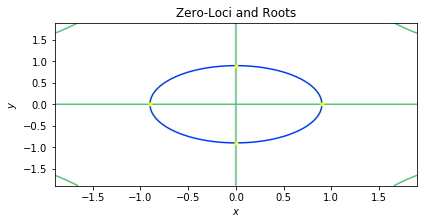

Number of roots: 4
Number found by yroots: 4
Distance between chebfun solutions and yroots solutions:
[6.07939800e-13 6.29644010e-14 1.27457484e-13 1.38482155e-13]


In [32]:
#01
f = lambda x,y: x**2+y**2-.9**2
g = lambda x,y: np.sin(x*y)

r1 = np.loadtxt('chebfun_test_output/cftest9_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

Percent Finished: 100%                                                  
Total intervals checked was 1
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 3600x2400 with 0 Axes>

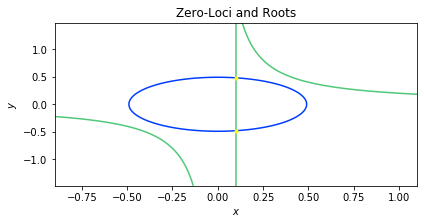

Number of roots: 2
Number found by yroots: 2
Distance between chebfun solutions and yroots solutions:
[7.89083741e-16 1.93340048e-15]


In [33]:
#02
f = lambda x,y: x**2+y**2-.49**2
g = lambda x,y: (x-.1)*(x*y-.2)

r1 = np.loadtxt('chebfun_test_output/cftest9_2.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

# `test_roots10`

Percent Finished: 42.01%       

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 2002
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [11.1389 87.2128  1.1489  0.4995  0.    ]


<Figure size 3600x2400 with 0 Axes>

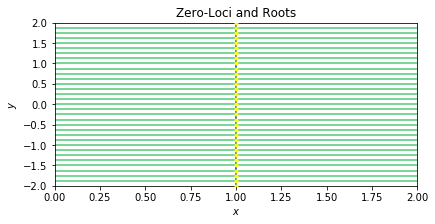

Number of roots: 17
Number found by yroots: 17
Distance between chebfun solutions and yroots solutions:
[4.90899394e-14 1.08648810e-14 3.26526387e-15 5.88418203e-15
 3.89211955e-15 2.61845577e-15 5.25050105e-15 9.56896656e-14
 4.50668312e-13 4.00666804e-14 1.89618325e-14 7.39299338e-15
 4.27255595e-15 2.31821373e-15 2.92054080e-15 4.13176028e-15
 1.69422362e-13]


In [34]:
#01
f = lambda x,y: (x-1)*(np.cos(x*y**2)+2)
g = lambda x,y: np.sin(8*np.pi*y)*(np.cos(x*y)+2)

r1 = np.loadtxt('chebfun_test_output/cftest10_1.csv',delimiter=',')
a = np.array([min(r1[:,0]),min(r1[:,1])])
b = np.array([max(r1[:,0]),max(r1[:,1])])
r2 = yr.solve([f,g],a-1,b+1,plot=True)
r2 = rootfilter(r2,a,b,1e-3)
print('Number of roots:',r1.shape[0])
print('Number found by yroots:',r2.shape[0])
if r1.shape[0] == r2.shape[0]:
    print('Distance between chebfun solutions and yroots solutions:')
    print(np.linalg.norm(np.sort(r1,axis=0)-np.sort(r2,axis=0),axis=1))
else:
    print("chebfun solutions:")
    print(np.sort(r1,axis=0))
    print("yroots solutions:")
    print(np.sort(r2,axis=0))

In [35]:
from yroots.polynomial import getPoly

In [36]:
np.random.seed(1)
a = -2*np.ones(2);b = 2*np.ones(2)
f = getPoly(20,2,True)
g = getPoly(28,2,True)
r2 = yr.subdivision.solve([f,g],a,b,plot=False)

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected

Percent Finished: 17.39%       

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Multiplication.py:248: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  varsToRemove = [np.argmax(np.abs(linear_polys[0].coeff[get_var_list(dim)]))]


Percent Finished: 100%                                                  
Total intervals checked was 3142
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [14.9905 84.4048  0.6047  0.      0.    ]


In [37]:
r2

array([[ 1.04095819,  0.81536952],
       [ 0.57957174,  0.95268139],
       [ 0.2525847 , -1.28000465],
       [-1.25050574,  1.1651383 ],
       [-0.97342425, -0.75551963],
       [-1.10596682, -1.11667073]])

In [38]:
trueRoots = r2.copy()

Percent Finished: 100%                                                  
Total intervals checked was 3199
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Spectral', 'Too Deep']
The percent solved by each was [14.7234 84.714   0.5627  0.      0.    ]


/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:18: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "polyval2" failed type inference due to: Invalid use of Function(<built-in function mul>) with argument(s) of type(s): (tuple(int64 x 1), Literal[int](1))
Known signatures:
 * (int64, int64) -> int64
 * (int64, uint64) -> int64
 * (uint64, int64) -> int64
 * (uint64, uint64) -> uint64
 * (float32, float32) -> float32
 * (float64, float64) -> float64
 * (complex64, complex64) -> complex64
 * (complex128, complex128) -> complex128
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected

KeyboardInterrupt: 

<Figure size 3600x2400 with 0 Axes>

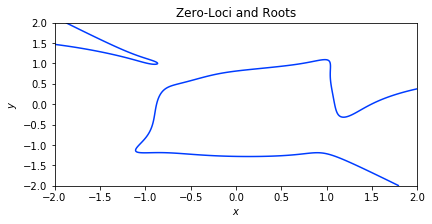

In [39]:
np.random.seed(1)
a = -2*np.ones(2);b = 2*np.ones(2)
f = getPoly(20,2,True)
g = getPoly(28,2,True)
n = 15
f.coeff *= 10**n
g.coeff *= 10**n

tols = dict()
# tols['rel_approx_tol'] = 1e-15
# tols['abs_approx_tol'] = 1e-15
# tols['max_cond_num'] = 1e5
# steps = [2,2,1,3,1,0,2,3,2,0,3,3,1,2,3,2,1,3,1,1,1,0,1,1,1]
# a,b = get_interval(steps,a,b)

r2 = yr.subdivision.solve([f,g],a,b,plot=True,plot_intervals=True,**tols)

In [ ]:
r2 - trueRoots

In [ ]:
endTime = time.time()

In [ ]:
endTime - startTime

In [ ]:
449.01611614227295
509.1809799671173